In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../../data/dengue_features_train.csv')
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [12]:
df.head(20)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


### Check data integrity (duplicates, where missing/NaN values exist, etc.)

In [16]:
# Duplicate rows
df_dup = df[df.duplicated()]
df_dup.shape

(0, 24)

In [19]:
df_miss_airtempk = df[df['reanalysis_air_temp_k'].isnull()]
print(df_miss_airtempk.shape)
df_miss_airtempk.head(30)

(10, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
87,sj,1992,1,1992-01-01,0.125100,0.157867,0.185283,0.181367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,sj,1998,1,1998-01-01,0.045500,0.047800,0.123986,0.083443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711,sj,2004,1,2004-01-01,-0.268300,-0.123700,0.223757,0.176543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,sj,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118,iq,2004,1,2004-01-01,0.202571,0.198967,0.244557,0.187957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1170,iq,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1378,iq,2009,1,2009-01-01,0.151286,0.161686,0.153271,0.119443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** 
**Looks like the 10 missing rows for the reanalysis columns are all the same - drop them!**

They are either week 1 or week 53 - likely a data collection issue?
** 

In [25]:
df.dropna(axis=0, subset=['reanalysis_air_temp_k'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1446 non-null   object 
 1   year                                   1446 non-null   int64  
 2   weekofyear                             1446 non-null   int64  
 3   week_start_date                        1446 non-null   object 
 4   ndvi_ne                                1257 non-null   float64
 5   ndvi_nw                                1399 non-null   float64
 6   ndvi_se                                1429 non-null   float64
 7   ndvi_sw                                1429 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [35]:
df.head(100)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [28]:
df_miss_airtempk = df[df['station_avg_temp_c'].isnull()]
print(df_miss_airtempk.shape)
df_miss_airtempk.head(33)

(33, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
981,iq,2001,20,2001-05-14,0.315343,0.319650,0.262700,0.303486,74.08,297.297143,298.307143,296.990000,305.6,294.7,80.30,98.341429,74.08,18.640000,5.642857,NaN,NaN,32.5,NaN,0.0
987,iq,2001,26,2001-06-25,0.192300,0.275286,0.316457,0.325414,1.22,294.845714,296.000000,290.572857,306.1,288.4,1.82,79.322857,1.22,12.464286,12.342857,NaN,NaN,32.3,17.1,31.0
1031,iq,2002,18,2002-04-30,0.170357,0.141829,0.197729,0.257071,60.05,297.408571,298.550000,296.222857,303.8,292.8,52.60,93.845714,60.05,17.807143,7.500000,NaN,NaN,33.5,21.2,1.0
1047,iq,2002,34,2002-08-20,0.345425,0.313540,0.295050,0.309267,31.71,296.184286,296.735714,292.451429,308.6,288.8,5.61,82.141429,31.71,14.045714,12.757143,NaN,NaN,33.1,20.8,70.6
1057,iq,2002,44,2002-10-29,0.329086,0.286214,0.294057,0.315929,89.77,298.518571,300.242857,296.900000,307.3,294.9,39.70,91.944286,89.77,18.602857,9.028571,NaN,NaN,34.1,22.5,34.1
1073,iq,2003,8,2003-02-19,0.126257,0.135514,0.103657,0.133714,25.03,298.567143,300.100000,296.392857,308.6,292.5,41.10,89.974286,25.03,18.020000,10.885714,NaN,NaN,32.4,23.3,121.9
1139,iq,2004,22,2004-05-27,0.190314,0.077843,0.193171,0.102329,35.43,297.305714,298.328571,295.958571,306.4,291.7,42.60,93.575714,35.43,17.500000,9.628571,NaN,NaN,33.3,20.5,28.2
1148,iq,2004,31,2004-07-29,0.208900,0.155500,0.220300,0.254257,85.96,296.017143,297.292857,294.471429,306.1,291.7,27.62,92.527143,85.96,15.975714,8.842857,NaN,NaN,32.9,19.4,6.0
1149,iq,2004,32,2004-08-05,0.248900,0.265957,0.218529,0.237557,29.82,297.517143,298.964286,293.144286,307.4,291.0,3.90,79.718571,29.82,14.694286,12.157143,NaN,NaN,34.0,18.3,55.1
1150,iq,2004,33,2004-08-12,0.191071,0.227000,0.168529,0.295700,18.44,296.530000,297.635714,292.222857,307.2,288.1,4.10,79.235714,18.44,13.824286,12.185714,NaN,NaN,31.3,20.0,0.5


In [31]:
df_miss_airtempk = df[df['ndvi_sw'].isnull()]
print(df_miss_airtempk.shape)
df_miss_airtempk.head(50)

(17, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
191,sj,1994,52,1994-01-01,NaN,NaN,NaN,NaN,5.25,298.527143,298.778571,294.401429,301.0,296.0,3.40,78.018571,5.25,15.780000,2.442857,26.971429,8.200000,32.8,21.7,0.3
229,sj,1994,38,1994-09-24,NaN,NaN,NaN,NaN,39.22,299.885714,300.035714,295.961429,302.3,298.1,50.70,79.314286,39.22,17.354286,1.985714,28.371429,6.185714,32.2,24.4,34.3
230,sj,1994,39,1994-10-01,NaN,NaN,NaN,NaN,55.88,299.508571,299.642857,295.821429,301.8,297.7,45.20,80.372857,55.88,17.248571,2.600000,28.014286,6.700000,33.9,23.3,31.5
231,sj,1994,40,1994-10-08,NaN,NaN,NaN,NaN,0.63,300.377143,300.500000,295.362857,302.5,298.7,2.80,74.117143,0.63,16.744286,2.628571,28.714286,6.900000,34.4,24.4,8.2
232,sj,1994,41,1994-10-15,NaN,NaN,NaN,NaN,16.70,299.638571,299.621429,295.481429,302.9,297.8,40.80,78.225714,16.70,16.900000,2.728571,28.328571,7.657143,35.0,23.9,39.2
233,sj,1994,42,1994-10-22,NaN,NaN,NaN,NaN,75.57,300.238571,300.400000,295.685714,303.0,298.3,15.81,76.348571,75.57,17.124286,3.028571,28.571429,7.442857,35.0,23.9,5.4
234,sj,1994,43,1994-10-29,NaN,NaN,NaN,NaN,111.52,298.811429,298.857143,296.171429,300.5,297.5,64.85,85.417143,111.52,17.641429,1.657143,27.671429,7.271429,32.8,23.3,39.2
235,sj,1994,44,1994-11-05,NaN,NaN,NaN,NaN,5.41,299.867143,300.050000,295.845714,301.9,298.3,15.60,78.685714,5.41,17.264286,2.328571,28.157143,6.842857,32.2,24.4,1.9
236,sj,1994,45,1994-11-12,NaN,NaN,NaN,NaN,32.26,299.297143,299.128571,295.580000,301.5,297.2,36.60,80.095714,32.26,16.984286,2.228571,27.314286,6.928571,31.7,22.2,54.5
237,sj,1994,46,1994-11-19,NaN,NaN,NaN,NaN,32.17,299.198571,299.300000,296.174286,302.2,297.5,47.50,83.584286,32.17,17.644286,1.771429,27.285714,7.314286,32.8,22.2,47.5


**Further missing data exploration**

The ndvi missing values group for the most complete columns.

There's no clear overlap in missing between the "station_avg_temp_c" and "ndvi_XX" missing values.

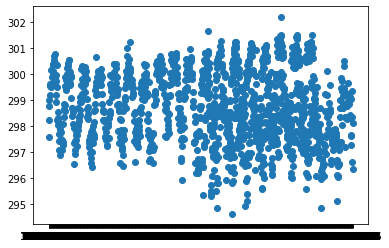

In [21]:
plt.scatter(df.week_start_date, df.reanalysis_air_temp_k )